### Módulo: Introducción a la Ciencia de Datos
# **Clase 6: Manejo/Doma de Datos (_Data Wrangling_)**

En los casos de la vida real, los datos tendrán inconvenientes: valores perdidos, errores ortográficos, errores de digitación, valores atípicos, entre otros. Un buen análisis de datos (e incluso un buen modelo de Machine Learning) necesitan de una base de datos limpia, coherente y manejable. En otras palabras, _bien comportada_ o _domada_.

Sin embargo, ello requiere de un proceso de observar, corregir y adaptar la base de datos a nuestras necesidades. En esta clase, recorreremos algunas de las buenas prácticas para la limpieza de datos. No obstante, primero debemos importar los datos:

## 1. Importe de los datos

Para importar los datos, podemos utilizar diferentes métodos dependiendo del formato:

* Excel: `pandas.read_excel()`
* CSV: `pandas.read_csv()`
* DTA: `pandas.read_stata()`
* RData: `pyreadr.read_r()`

Cada uno de ellos tiene sus propias opciones, por lo cual siempre es recomendable leer un poco sobre el método antes. Por ahora, tendremos un pequeño ejemplo con una archivo .csv sobre información sobre marketing:

In [1]:
import pandas as pd

# Importando los datos
data = pd.read_csv("Marketing_Analysis.csv")
data.head()

C:\Users\juanm\AppData\Local\Temp\ipykernel_6628\4007060575.py:4: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Marketing_Analysis.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


Como podemos observar, las columnas no tienen los nombres que necesitamos. En ese sentido, debemos decirle a Python cómo queremos que lea los datos. En este caso, vamos a decirle que se salte dos columnas (la primera está vacía y la segunda es la explicacion de la columna):

In [2]:
# Importando los datos
data = pd.read_csv("Marketing_Analysis.csv", skiprows = 2)
data.head(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


Ahora echemos un vistazo a la base de datos: es una base de datos sobre consumidores. Pero, ¿qué datos tenemos? Tenemos dos tipos:

* **Datos sociodemográficos:** la edad, salario, balance de dinero, estado marital, educación y trabajo,
* **Datos financieros:** salario, si tiene un préstamo o no, si tiene casa o no.
* **Datos internos de la empresa y campaña de marketing:** día, mes y año de contacto, si estuvo o no seleccionado para la campaña, si se aplicó o no la campaña y duración de la llamada.

Es importante ver qué tipos de datos tenemos para saber a qué nos enfrentamos, qué datos hacen falta para nuestro objetivo, comportamientos atípicos, entre otros.

Por ahora, veamos qué tamaño tiene la base de datos:

In [17]:
# Dimensiones de la base de datos
data.shape

(45211, 19)

Esto nos dice que la base de datos tiene 19 columnas y 45211 filas. En otras palabras, tenemos 19 variables y 45211 consumidores (observaciones) en nuestra base de datos. 

-------------------------------------------------------------

#### Ejercicio

Descargue la proyección de población realizada por el DANE que se encuentra en el siguiente [enlace](https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/proyecciones-de-poblacion) y cárguela en Python. Debe tener cuidado, porque esta base de datos no empieza en la fila 1, sino más adelante:

-------------------------------------------------

# 2. Valores perdidos (_missings_)

## 2.1. Exploración de valores perdidos

Los valores pérdidos son celdas que no registran ningún tipo de dato. Normalmente son representados en Python con `NaN` o `na`. En algunos casos, los valores perdidos pueden afectar los análisis descriptivos e inferenciales que se relicen, por lo cual se debe hacer un procedimiento para evitarlo. 

Sin embargo, antes de realizar cualquier procedimiento (que en un momento veremos), es importante analizar si existe algún patrón de comportamiento sobre los valores perdidos que nos puedan entregar información adicional. Es decir, **en ocasiones la pérdida de datos significa algo**, como por ejemplo la pérdida de datos de edad en las denuncias de algunos delitos: ello nos puede indicar que son menores de edad quienes son víctimas. Otros casos es la pérdida de datos en recolección de datos sobre género.

Teniendo en cuenta lo anterior, realicemos una exploración pequeña. Veamos primero qué columnas presentan pérdida de datos:

In [3]:
# Suma de los valores perdidos por variables
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Podemos observar que las variables `age`, `month` y `response` tienen pérdida de datos. Sin embargo, estamos analizando una información que podemos complementar con un enfoque relativo. Es decir, preguntémonos cuán grave es la pérdida de datos respecto al total de los datos registrados. Por tanto, encontremos el porcentaje de datos perdidos respecto al total con el siguiente código:

In [5]:
# Porcentaje de los valores perdidos por variables
data.isnull().sum()/len(data)*100

customerid    0.000000
age           0.044237
salary        0.000000
balance       0.000000
marital       0.000000
jobedu        0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.110593
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome      0.000000
response      0.066356
dtype: float64

Lo que vemos en el _output_ anterior es el porcentaje sobre el total de filas de valores perdidos. Como se puede observar, ninguno alcanza un porcentaje de pérdida mayor al 1% del total de los datos. Ello significa que esta base de datos tiene una altísima calidad (algo que será muy extraño en la vida real de la Ciencia de Datos).

Aun así, exploremos un poco la edad para observar si existe una pérdida sistemática de datos que nos pueda guiar sobre el proceso. Empecemos con la variable `age`:

In [7]:
# Obtenemos la base de datos solamente con las observaciones que registran missings
data[data.age.isnull()].head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
161,162,NaN,60000,47,single,"technician,tertiary",no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no
1021,1022,NaN,60000,-500,married,"technician,secondary",yes,no,yes,no,unknown,7,"may, 2017",78 sec,5,-1,0,unknown,no
1585,1586,NaN,100000,123,divorced,"management,secondary",yes,no,no,no,unknown,8,"may, 2017",306 sec,2,-1,0,unknown,no
3943,3944,NaN,70000,62,married,"services,tertiary",yes,no,yes,yes,unknown,16,"may, 2017",280 sec,2,-1,0,unknown,no
5675,5676,NaN,20000,-85,married,"blue-collar,primary",yes,no,yes,yes,unknown,26,"may, 2017",118 sec,1,-1,0,unknown,no


Si bien aquí obtenemos la base filtrada por aquellas observaciones que tienen valores perdidos en la variabel `age`, no resulta muy clara la tendencia de esta variable respecto a otras. Por ello, procesemos un poco los datos para observar bien qué ocurre en el cruce con otras variables. Con el siguiente código, se puede establecer en la variable `var` cualquiera de las columnas que deseemos ver y sacará una tabla con los valores perdidos por la variable establecida.

Juguemos con el código probando con las variables `month`, `loan` y `salary`:

In [11]:
# Se define la variable por la que se quiere agrupar
var = "marital"

# Se agrupa por categorías de la variable
data[data.age.isnull()][["customerid", var]].groupby(var).count()

,customerid
marital,
divorced,6
married,10
single,4


Como se pudo observar, no existe una distribución definida de los valores perdidos de `age` en ninguna variable de manera sistemática. ¿Cómo sabemos esto? Porque no se observa una concentración atípicamente alta de los valores perdidos en una variable específica. Por ejemplo, no se observa que todos los valores perdidos se los lleva junio o diciembre para la variable `month`. Los mismo ocurre con las otras variables, ya que se identifica una distribución más o menos equitativa entre todas las categorías. 

Solamente se observa para la variable `month` una concentración en el mes de mayo, pero desaparece al observar esta distribución como porcentaje del total de observaciones para esa categoría:

In [12]:
# Se divide el conteo de valores perdidos sobre el conteo de todos los valores por categoría
var = "month"

data[data.age.isnull()][["customerid", var]].groupby(var).count()/data[["customerid", var]].groupby(var).count()

,customerid
month,
"apr, 2017",0.000341
"aug, 2017",0.000801
"dec, 2017",NaN
"feb, 2017",NaN
"jan, 2017",NaN
"jul, 2017",0.000436
"jun, 2017",0.000375
"mar, 2017",NaN
"may, 2017",0.000509


Solo en algunas variables se ve un pequeño cambio cuando se convierte en porcentaje, pero no haremos mucho hincapié en este detalle ya que no es definitiva. Por el contrario, tenemos una buena base de datos.

## 2.2. Estrategias para mitigar el impacto de los valores perdidos

Dado que ya revisamos que no vamos a afectar valores perdidos que podrían estarnos dando información adicional, podemos pensar en cómo mitigar su impacto por medio del procesamiento de sus valores. Las estrategias más ampliamente utilizadas son las siguientes:

* **Eliminación:** se eliminan las filas y/o columnas que tengan los valores perdidos.
* **Imputación:** se reemplaza el valor perdido por algún valor que tenga sentido. Hay tres formas básicas de hacerlo:
    - Reemplazarlo por valores al azar dentro de la distribución de los datos.
    - Reemplazarlo por valores discresionales o guiados por un conjunto de reglas preestablecidas.
    - Reemplazarlo por la moda, media o mediana.
    - Reemplazarlo por un valor predicho por un algoritmo de Machine Learning.

> **Nota:** antes de cualquier tipo de modificación de los datos, primero debe comprobarse que la modificación no va a afectar significativamente el comportamiento de los datos o que se pierda información en el proceso. Por ello se realizó la exploración de valores perdidos preliminar.

Revisemos cada tipo de estrategia de manera pedagógica:

### 2.2.1. Eliminación

La eliminación hace referencia a la eliminación del conjunto de columnas y/o filas que presentan valores perdidos. El beneficio de esta estrategia consiste en no modificar valores que puedan afectar el comportamiento de los datos, especialmente si queremos explotar la variabilidad de los microdatos para obtener inferencia causal.

En este sentido, la pregunta fundamental para decidir utilizar una estrategia de eliminación de datos es **¿qué tanto afecta la eliminación de los valores perdidos a la base de datos?** En otras palabras, debemos pensar si la eliminación de las columnas y/o filas que contienen los valores perdidos afecta bastante, poco o nada a la base de datos y los análisis y modelos que derivaremos de ella.

Teniendo en cuenta lo anterior, resulta pertinente preguntarse si es preferible eliminar una columna o una serie de filas. Para ello, primero debemos preguntarnos: ¿la pérdida de datos se da en sentido de columna o sentido de fila? Es decir, ¿los valores perdidos se dan porque una columna/variable concentra los valores perdidos o si se distribuye entre diferentes variables? 

Si la respuesta resulta en que una o unas pocas columnas concentran la mayoría de datos perdidos, podemos preguntarnos sobre la utilidad de esa columna en el análisis que se realizará: ¿la variable va a ser utilizada en el análisis y/o construcción de modelos? Si dicha columna no tiene un valor agregado significativo en el análisis, es preferible eliminar la columna en vez de eliminar las filas y observaciones asociadas a la pérdida de información. Si la columna es importante, debemos mantenerla y hacernos otras preguntas que ya hacen referencia a las filas y observaciones.

Si la respuesta resulta en que no existe una columna que concentra toda la pérdida de información o si debemos mantener la columna a pesar de su baja calidad de recolección, debemos volcarnos al análisis de pérdida de información desde las filas u observaciones. A partir de este punto, puede ocurrir dos cosas: 1. Hay pocas filas u observaciones con pérdida de datos o 2. Hay muchas filas u observaciones con pérdida de datos.

En el primer caso (pocas filas u observaciones), podemos utilizar una regla simple que se acepta en la práctica: si el número de filas con pérdida de datos no supera el 5% de los datos, podemos eliminarnos. **¡Cuidado! Todo esto se decide después de un análisis minucioso sobre el tipo de datos que se están eliminando, porque podríamos eliminar datos que nos dan cuenta de fenómenos complejos que son el objetivo de nuestro análisis**. Si se ha observado que no existe una sistematicidad o patrón particular de la pérdida de información, podemos eliminar estas filas.

En el segundo caso, **debemos evaluar si podemos realizar eliminaciones parciales o si se debe eliminar todas las filas**. Si se puede utilizar algún hallazgo para no eliminar todas las observaciones, podemos mitigar el efecto de la eliminación en la base de datos. Si no, entonces debemos preguntarnos si es una pérdida masiva de observaciones. Si es masiva, debemos enfocarnos más en estrategias de imputación.

Ahora vamos a la práctica. Analicemos cuánta pérdida de información tenemos como porcentaje por variable con un código conocido:

In [9]:
data.isnull().sum()/len(data)*100

customerid    0.000000
age           0.044237
salary        0.000000
balance       0.000000
marital       0.000000
jobedu        0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.110593
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome      0.000000
response      0.066356
dtype: float64

Al parecer no tenemos pérdida masiva de datos: ninguno supera más del 1% de los datos. Adicionalmente, no hay una columna que tenga una concentración grande de pérdida de datos para eliminarla de forma directa. En este caso, **la estrategia apropiada sería eliminar las filas que presentan pérdida de datos y no columnas**. El efecto parecería no ser significativo sobre la base de datos.

Para esta ocasión y con objetivos pedagógicos, **eliminemos dos columnas** (`age` y `response`) con el método `drop()`:

In [ ]:
test = data.copy()

In [13]:
# Creamos una copia de la base original para no afectar los datos
test = data.copy()

# Eliminamos la columna age
test = test.drop(['age', 'response'], axis = 1)

# Revisamos las columnas de la base de datos
test.columns

Index(['customerid', 'salary', 'balance', 'marital', 'jobedu', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

El método `drop()` permite eliminar, a la vez, columnas y filas según le indiquemos. Para ello está la opción `axis`: se especifica `axis = 0` para **eliminar filas** y `axis = 1` para **eliminar columnas**. 

> **Nota de programación:** el método `.copy()` es fundamental al generar copias de las bases de datos. Si no se incluye este y se escribe, para este caso, `test = data`, cualquier modificación que se haga en `test` también se va a ver reflejada en `data`. 

Ahora probemos eliminando las filas que tienen un valor perdido en la columna `response`. Para este proceso, podríamos utilizar el método `drop()`, pero resulta bastante complejo porque hay que estipular los índices de las columnas a eliminar. Bajo esta premisa, utilizaremos otro método de filtración que hemos utilizado antes a partir de condiciones:

In [11]:
# Creamos una copia de la base original para no afectar los datos
test = data.copy()

# Imprimimos el número de filas inicial
print("Número de filas antes de la eliminación: \t", test.shape[0])

# Filtramos las filas a partir de la negación de la condición de que sean nulos
test_filtered = test[~(test['age'].isnull())]

# Imprimimos el número de filas tras la eliminación
print("Número de filas después de la eliminación: \t", test_filtered.shape[0])

# Imprimimos el número de filas eliminadas
print("Filas eliminadas: \t\t\t\t", test.shape[0] - test_filtered.shape[0])

Número de filas antes de la eliminación: 	 45211
Número de filas después de la eliminación: 	 45191
Filas eliminadas: 				 20


> **Nota:** en este caso estamos utilizando lo que hemos aprendido sobre condicionales. De manera resumida, el método `isnull()` nos ayuda a obtener una condición que evalúa si un valor es o no perdido. Cuando utilizamos el operados "`~`" negamos esa condición, con lo cual obtiene el conjunto de datos que no son _missings_. Es decir, con esto tenemos la base de datos que no tiene valores perdidos.

### 2.2.2. Imputación

La imputación hace referencia a adjudicarle un valor establecido a las celdas donde se encuentran los valores perdidos. Para ello tenemos tres estrategias principales:

#### 2.2.2.1. Reemplazo por valores aleatorios

#### 2.2.2.2. Reemplazo por valores discresionales o guiados por un conjunto de reglas preestablecidas

En algunos casos, la exploración preliminar nos otorga información suficiente para saber qué valor es el faltante. Incluso el conocimiento sobre la fuente o forma de recolección de la base de datos nos entrega esa información. Por ejemplo, si en la recolección de los datos no había opciones para indicar que alguien era menor de edad, podríamos saber que los valores perdidos se deben a eso y reemplazar los _missings_ con este hallazgo.

Ahora, es mejor estar seguros antes de hacer un cambio discresional de esta manera. Por lo general, se realizan encuestas, grupos focales o investigaciones sobre el fenómeno que causó la pérdida de información. En el caso que acabamos de establecer, una guía de acción válida es dirigirse a la fuente principal (los clientes o quienes digitaron la información) y preguntarles por qué los datos están vacíos. Con ello tenemos una claridad.

Paralelamente, también se puede imputar valores a partir de una serie de reglas o condiciones. Por ejemplo, si sabemos que las personas de 18 años no pueden ganar más de US$1.000, pues tenemos una idea de qué puede ayudarnos a saber cuál es un valor perdido a partir de otra columna de la que sí tenemos información. Nuevamente, esto se genera a partir del análisis de los fenómenos en los que estamos trabajando.

Por ahora y de manera pedagógica, vamos a suponer que sabemos que los valores perdidos corresponden a menores de edad. Para ello, podemos modificar los valores perdidos por un valor establecido de la siguiente manera:

In [29]:
# Creamos una copia de la base original para no afectar los datos
test = data.copy()

# Se reemplaza los casos de valores perdidos por la moda
test.loc[test.age.isnull()] = "<18"

# Chequeamos los valores únicos de la variable intervenida
print("Valores únicos:\n")
print(test.age.unique())

# Chequeamos los valores perdidos
print("Lista de valores perdidos por variable:\n")
test.isnull().sum()

Valores únicos:

[58.0 44.0 33.0 47.0 35.0 28.0 42.0 43.0 41.0 29.0 53.0 57.0 51.0 45.0
 60.0 56.0 32.0 25.0 40.0 39.0 52.0 46.0 36.0 49.0 59.0 37.0 50.0 54.0
 55.0 48.0 24.0 38.0 31.0 30.0 27.0 34.0 23.0 26.0 '<18' 61.0 22.0 21.0
 20.0 66.0 62.0 83.0 75.0 67.0 70.0 65.0 68.0 64.0 69.0 72.0 71.0 19.0
 76.0 85.0 63.0 90.0 82.0 73.0 74.0 78.0 80.0 94.0 79.0 77.0 86.0 95.0
 81.0 18.0 89.0 84.0 87.0 92.0 93.0 88.0]
Lista de valores perdidos por variable:



customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

¡Vòila! No hay ningún valor perdido para `age` y se incluye en la lista de valores únicos el dato de `<18`.

> **Nota:** ¿por qué se reemplazó por el valor `<18` y no por números como el 17, 16, 15, entre otros? La razón se basa en que podemos saber que esos datos están perdidos porque eran menores de edad, pero **_no sabemos qué edad entre 0 y 17 tenían cuando la base fue recolectada_**. Esto solamente lo podemos saber si se hace una investigación más exhaustiva. Hasta entonces, resulta preferible ser más conservadores con la imputación de los datos.

> **Nota de programación:** el método `.copy()` es fundamental al generar copias de las bases de datos. Si no se incluye este y se escribe, para este caso, `test = data`, cualquier modificación que se haga en `test` también se va a ver reflejada en `data`. 

#### 2.2.2.3. Reemplazo por medidas de tendencia central (media, mediana o moda)

La estrategia de reemplazo por medidas de tendencia central son bastante utilizadas para evitar una pérdida considerable de información sin afectar, precisamente, las medidas de tendencia central y el comportamiento típico de la distribución de los datos. Resulta positiva para mantener el comportamiento _promedio_ o _general_ de los datos, pero puede afectar levemente los resultados de algunos análisis cuando se llevan al detalle del micro dato.

Así mismo, el uso de cada una de las medidas de tendencia central depende de la situación a la que el o la analista se enfrenta, la distribución de los datos y el objetivo de su análisis. En detalle, se utiliza cada una en los siguientes casos:

- **Media:** también llamada promedio, se utiliza sobre todo en distribuciones normales, en las cuales la media representa bastante bien la tendencia de los datos y su distribución típica. **Es la estrategia más utilizada y sencilla**.
- **Mediana:** se utiliza en distribuciones sesgadas no normales, en las cuales la media también tiende a sesgarse hacia la cola con mayor peso de lo distribución. Por tanto, en este caso, la media no representa bien la tendencia central de los datos ni su distribución típica, por lo cual se utiliza la mediana (o percentil 50) como representación de los datos. **Es la estrategia más utilizada y sencilla para distribuciones sesgadas**.
- **Moda:** como la mediana, se utiliza en distribuciones sesgadas no normales o en datos tipo categóricos, dado que es más probable que el valor perdido sea el dato de la moda que otro valor. Sin embargo, tiene alta probabilidad de sesgar aún más los datos, pues sobre-representará un valor o categoría en los datos. Por tanto, **solo debe ser usado si se cuenta con un fundamento teórico bastante fuerte para deducir que es el mejor valor a usar**.

Por ahora, vamos a imputar la media de los datos de la edad a los missings de los datos. Para este caso, se utilizará la función `fillna()`, pero se puede imputar con el método anterior de asignar datos a los valores perdidos. La ventaja de la función `fillna()` es que imputa todos los valores perdidos de todas las columnas de la base de datos al tiempo. En esta ocasión solo lo haremos para la columna de `age`:

In [13]:
# Creamos una copia de la base original para no afectar los datos
test = data.copy()

# Se encuentra la media
replace_value = test.age.mean()

# Se imputan los datos
test.age.fillna(replace_value, inplace = True)

# Chequeamos los valores perdidos
test.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Ahora revisaremos si existe algún cambio en la distribución de los datos:

In [31]:
data.age.unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., nan,
       61., 22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64.,
       69., 72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80.,
       94., 79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

TypeError: '<=' not supported between instances of 'float' and 'str'

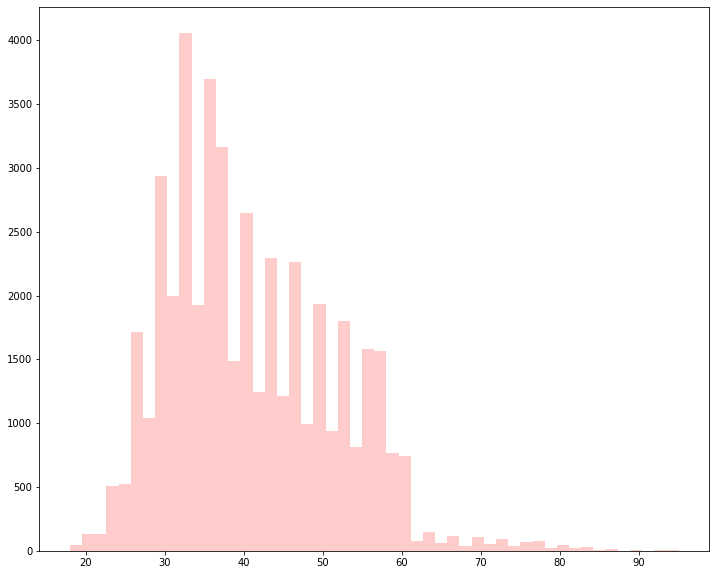

In [30]:
# Se importan las librerías 
import matplotlib.pyplot as plt
import statistics
import numpy as np

# Se crean los subplots para doble eje
plt.figure(figsize=(12,10))


# Gráfica de shared rooms
plt.hist(data["age"],\
         bins = 50, alpha = 0.2, color = "red", label = "Without Imputation")

# Gráfica de private rooms
plt.hist(test["age"],\
         bins = 50, alpha = 0.2, color = "blue", label = "With Imputation")

# Vertical line of the median
plt.axvline(x = np.nanmean(data["age"]),\
            color = 'red', linestyle = "dashed")
plt.axvline(x = statistics.mean(test["age"]),\
            color = 'blue', linestyle = "dashed")

plt.axvline(x = np.nanmedian(data["age"]),\
            color = 'black', linestyle = "dashed")
plt.axvline(x = statistics.median(test["age"]),\
            color = 'grey', linestyle = "dashed")


# Título de la gráfica
plt.title("Histograma comparativo de la distribución de edad por imputación")

# Leyenda
plt.legend(loc = "upper right", bbox_to_anchor = (1,1))

# Título del eje x e y
plt.xlabel('Edad')
plt.ylabel('Frecuencia de edad')

# Printing means
print("Mean without imputation: \t", round(np.nanmean(data["age"]), 3))
print("Mean with imputation: \t\t", round(statistics.mean(test["age"]), 3))

# Printing Medians
print("Median without imputation: \t", round(np.nanmedian(data["age"]), 3))
print("Median with imputation: \t", round(statistics.median(test["age"]), 3))


# Se muestra la gráfica
plt.show()

Sorpresivamente, el cambio no es significativo: tan solo una de las barras tiene un pequeño cambio en su distribución, el resto no lo tiene. Ni siquiera le mediana tiene un cambio percibible. Esto ocurre porque **el número de valores perdidos es bastante bajo**. Por tanto, los cambios no son observables bajo los métodos que aquí mostramos. Sin embargo, si los valores perdidos crecieran considerablemente, podríamos experimentar un cambio considerable sobre la distribución de los datos.

##### Pequeño Ejercicio:

¿Cuál estrategia nos sirve más para tratar estos valores perdidos? ¿Eliminación o imputación?

Variable `month`.

In [48]:
data.month.isnull().sum()/(len(data))

0.001105925549092035

In [45]:
data[data.month.isnull()]

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
189,190,31.0,100000,0,single,"management,tertiary",no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no
769,770,39.0,20000,245,married,"blue-collar,primary",yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no
860,861,33.0,55000,165,married,"retired,secondary",yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no
1267,1268,36.0,50000,114,married,"admin.,secondary",yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no
1685,1686,34.0,20000,457,married,"blue-collar,secondary",yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no
1899,1900,49.0,16000,164,divorced,"housemaid,primary",yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no
2433,2434,26.0,60000,3825,married,"technician,tertiary",yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no
2612,2613,38.0,50000,446,single,"admin.,unknown",no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no
2747,2748,48.0,120000,2550,married,"entrepreneur,unknown",no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no
3556,3557,41.0,20000,59,married,"blue-collar,secondary",yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no



--------------------
**¡Importante!**

La eliminación como estrategia de manejo de valores perdidos tiene las siguientes ventajas y desventajas:

* **Ventajas:**
    - **Elimina "ruido":** en ocasiones, los valores perdidos llevan a conclusiones erróneas cuando son tenidas en cuenta en el análisis o modelamiento.
    - **Resulta menos distorsionante que la imputación:** en ocasiones la imputación puede distorsionar altamente las bases de datos, ya que forza que una variable tenga un valor predeterminado por el o la analista. En dicha situación puede colarse el sesgo mismo de quien imputa.

* **Desventajas:**
    - **Reduce las observaciones:** en la mayoría de casos, esto no se puede realizar en bases de datos pequeñas, ya que cualquier pérdida de información es sumamente grave. Por ejemplo, en casos de enfermedades huérfanas (algunas cuentan con solo 10 casos a nivel mundial) la eliminación de datos puede ser supremamente perjudicial.
    - **Puede eliminar información importante escondida en la pérdida de datos:** en ocasiones, la pérdida de información ofrece también información. Es decir, en ocasiones que no exista un dato puede tener una causa que ayude a entender el problema. Por ejemplo, en encuestas es común encontrar valores perdidos en preguntas sobre género, lo que puede indicar que la persona encuestada no se siente cómoda con las opciones existentes o que no quiere decir su género dado que es no binario o disidente.
    
--------------------

----------------
**¡Importante**

La imputación como estrategia de manejo de valores perdidos tiene las siguientes ventajas y desventajas:

* **Ventajas:**
    - **Mantiene las observaciones:** mantiene el mayor número de observaciones posibles, tal que permite cumplir con requisitos sobre el tamaño de la muestra.
    - **Puede ser precisa en algunos casos:** con un buen análisis de los datos presentados y el fenómeno en cuestión, se puede inferir precisamente cuáles son los datos perdidos. Incluso, hasta modelos modernos de Machine Learning permiten obtener datos precisos al respecto.

* **Desventajas:**
     - **Genera "ruido":** en ocasiones, si se realiza mal el procedimiento, puede generar datos erróneos que deriven en conclusiones erróneas.
    - **Puede inducir el sesgo del analista:** en ocasiones la imputación puede distorsionar altamente las bases de datos, ya que forza que una variable tenga un valor predeterminado por el o la analista. En dicha situación puede colarse el sesgo mismo de quien imputa.
    
--------------------

# 3. Modificación de variables

## 3.1. Transformación de variables conglomeradas

Las bases de datos van a tener variables que van a tener adecuadamente diferenciadas sus variables. Sin embargo, en ocasiones tendremos que modificarlas para hacerlas útiles para nuestros objetivos. Las formas más fáciles de modificación de columnas es cambiarle el tipo de variable (cosa que ya hemos visto con anterioridad). No obstante, hay algunas variables que debemos modificar con mayor profundidad. En esto se incluyen errores ortográficos, errores de digitación, entre otros.

Analicemos detenidamente las variables `month` y `day`:

In [118]:
# Se seleccionan las columnas de interés
data[["day", "month"]]

,day,month
0,5,"may, 2017"
1,5,"may, 2017"
2,5,"may, 2017"
3,5,"may, 2017"
4,5,"may, 2017"
...,...,...
45206,17,"nov, 2017"
45207,17,"nov, 2017"
45208,17,"nov, 2017"
45209,17,"nov, 2017"


Como se puede observar, no representan una fecha exactamente. Por el contrario, combinan dos tipos de datos: `str` e `int`. Veamos esto con el método `dtypes` que nos indica los tipos de los datos:

In [119]:
# Se revisan los tipos de las columnas
data[["day", "month"]].dtypes

day       int64
month    object
dtype: object

Resultaría mucho más útil tener una sola columna del tipo `datetime`. Sin embargo, la variable `month` combina tanto el mes como el año. Para separarlos, podemos realizar el siguiente proceso con el método `str.split()`:

In [120]:
# Se separan el mes y el año
data[["month", "year"]] = data["month"].str.split(",", expand = True)

# Se revisan los datos
data[['month', 'year']]

,month,year
0,may,2017
1,may,2017
2,may,2017
3,may,2017
4,may,2017
...,...,...
45206,nov,2017
45207,nov,2017
45208,nov,2017
45209,nov,2017


Ahora, tenemos el día, el mes y el año en diferentes columnas. Sería de mayor utilidad tenerla en una sola:

In [121]:
# Se combinan las tres columnas como una cadena de texto
data["date"] = data.day.astype(str) + "/" + data.month + "/" + data.year

# Removiendo un espacio
data.date = data['date'].str.replace(' ', '') 

# Convirtiendo la columna en un datetime
data.date = pd.to_datetime(data['date'])

# Revisando la columna de la fecha
data.dtypes

customerid             int64
age                  float64
salary                 int64
balance                int64
marital               object
jobedu                object
targeted              object
default               object
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration              object
campaign               int64
pdays                  int64
previous               int64
poutcome              object
response              object
year                  object
date          datetime64[ns]
dtype: object

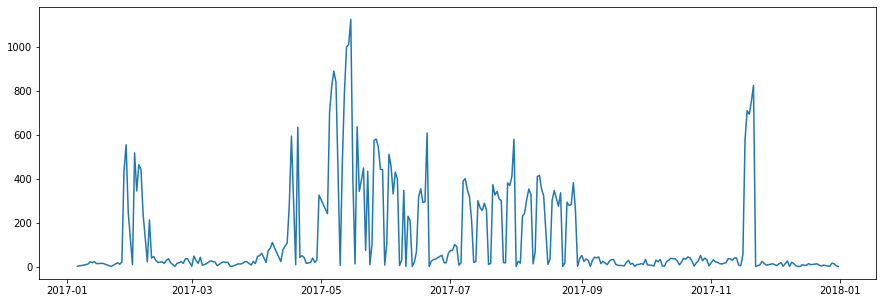

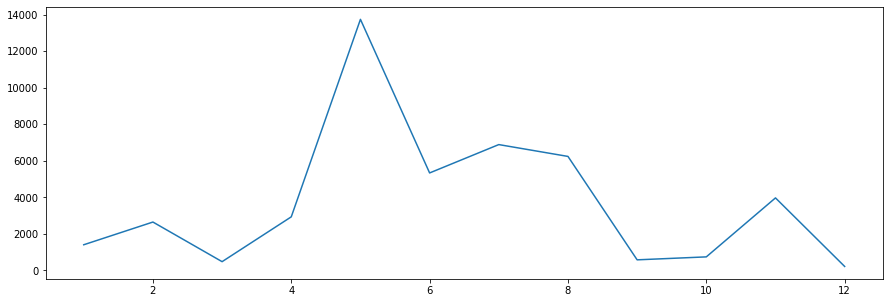

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfica por día
plt.figure(figsize = (15, 5))

df_temp = data[['customerid', 'date']].groupby('date').count().reset_index()

plt.plot('date', 'customerid', data = df_temp)

plt.show()

# Gráfica por mes
plt.figure(figsize = (15, 5))

data['mes'] = data['date'].dt.month
df_temp = data[['customerid', 'mes']].groupby('mes').count().reset_index()

plt.plot('mes', 'customerid', data = df_temp)

plt.show()

--------------------------------------------

#### Ejercicio

Convierta la variable `duration` en una variable de segundos enteros.

Convierta la variable `jobedu` en dos columnas diferentes.

---------------------------------------------------------

## 3.2. Falsos datos

En algunas ocasiones, observaremos que los datos no tienen valores perdidos. Aun así, si hacemos un análisis más completo y profundo, encontraremos que existen valores equivalentes a valor perdido, pero que tienen una opción diferente al vacío. En estos casos, se nos presentan dos situaciones:

* Los falsos valores son valores perdidos.
* Los falsos valores tienen una razón de ser y reflejan información adicional.

Revisemos la columna `contact`:

In [19]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Como se puede observar, existen valores de contacto de celular, teléfono y desconocido. Por lo general, esta representa un valor perdido. Sin embargo, ¡cuidado! Puede que signifique que las personas se acercaron caminando a la sucursal o que existe un canal diferente no conocido. Se debe primero analizar.

En términos pedagógicos, vamos a asumir que este valor es perdido. Reemplacémoslo:

In [20]:
import numpy as np

data.loc[data['contact'] == 'unknown', 'contact'] = np.nan

data.loc[data['contact'].isnull(), 'contact']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
45061    NaN
45062    NaN
45122    NaN
45135    NaN
45136    NaN
Name: contact, Length: 13020, dtype: object

-------------------------------------------------------

#### Ejercicio

Revise la variable `poutcome` y compruebe si tiene un falso valor. Si sí, reemplácelo con un valor perdido.